In [3]:
import numpy as np
import json
from os import walk

In [39]:
data = {"H2":{"data":[]}, 
        "H3":{"data":[]}, 
        "H4":{"data":[]}, 
        "H5":{"data":[]}
        }

kinds = list(data.keys())
#read all data:
#f_dir = "C:/Users/beryl/Documents/WU/Main Topic/PythonFilesImportant/Data/Files/" # main pc dir
f_dir = "/users/baribowo/Documents/maintopic/PythonFilesImportant/Data/Files/" # office dir
_, _, onlyfiles = next(walk(f_dir))
print(onlyfiles)
for f in onlyfiles:
    f = open(f_dir+f)
    f_data = json.load(f)
    #data["H2"]["data"]
    print(f_data.keys(), len(f_data["data"]), f_data["kind"])
    data[f_data["kind"]]["data"].append(f_data["data"]) #aggregate data (probably a bad idea) using .extend, .append results in different set
    

['H3_Su_class_1.txt', 'H4_Hinde_QZ.txt', 'H3_mielke_main.txt', 'H5_Tablero.txt', 'H3_Su_class_2.txt', 'H2_Kolos.txt', 'H4_Hinde_TZ.txt', 'artificial_H2_Kolos.txt', 'H2_Wolniewicz_BO.txt', 'H3_mielke_vdw.txt', 'H3_mielke_ac.txt', 'H3_mielke_coll.txt']
dict_keys(['data', 'accuracy', 'kind', 'name', 'info']) 1409 H3
dict_keys(['kind', 'name', 'data', 'H21_data', 'H22_data', 'accuracy', 'info']) 1653 H4
dict_keys(['data', 'accuracy', 'kind', 'name', 'info']) 3263 H3
dict_keys(['info', 'accuracy', 'name', 'kind', 'data']) 2799 H5
dict_keys(['data', 'accuracy', 'kind', 'name', 'info']) 991 H3
dict_keys(['info', 'accuracy', 'name', 'kind', 'data']) 87 H2
dict_keys(['data', 'kind', 'name', 'accuracy', 'info']) 855 H4
dict_keys(['info', 'accuracy', 'name', 'kind', 'data']) 2000 H2
dict_keys(['info', 'accuracy', 'name', 'kind', 'data']) 670 H2
dict_keys(['data', 'accuracy', 'kind', 'name', 'info']) 220 H3
dict_keys(['data', 'accuracy', 'kind', 'name', 'info']) 140 H3
dict_keys(['data', 'accuracy

2000

In [145]:
# plot to check H2 data 
import matplotlib.pyplot as plt
model_num = 0
print("total data:", len(data["H3"]["data"][model_num]))
print(np.array(data["H3"]["data"][model_num]))
#r, energy = np.array(data["H2"]["data"][model_num]).T #only for H2
Ab = np.array(data["H3"]["data"][model_num])
r = Ab[:,0:Ab.shape[1]-1]
energy = Ab[:,Ab.shape[1]-1:Ab.shape[1]].reshape(-1)
'''
plt.rcParams["figure.figsize"] = (20,15)
fig, (ax1, ax2, ax3) = plt.subplots(3)
fig.suptitle('H data')
ax1.plot(r, energy)

from scipy.stats import norm
ax2.plot(r, norm.pdf(r),'r-', lw=5, alpha=0.6, label='norm pdf r')
ax3.plot(energy, norm.pdf(energy),'r+', lw=5, alpha=0.6, label='norm pdf energy')
'''

total data: 1409
[[ 2.170535    5.871594    6.040096    0.05197892]
 [ 3.16729     5.871594    6.927324    0.14024651]
 [ 3.28623     8.99159    12.21525     0.14860751]
 ...
 [ 3.44971     9.62197    10.20486     0.15756632]
 [ 3.24686     8.61673     9.71771     0.14600763]
 [ 3.2185      9.73266    12.89759     0.14402282]]


'\nplt.rcParams["figure.figsize"] = (20,15)\nfig, (ax1, ax2, ax3) = plt.subplots(3)\nfig.suptitle(\'H data\')\nax1.plot(r, energy)\n\nfrom scipy.stats import norm\nax2.plot(r, norm.pdf(r),\'r-\', lw=5, alpha=0.6, label=\'norm pdf r\')\nax3.plot(energy, norm.pdf(energy),\'r+\', lw=5, alpha=0.6, label=\'norm pdf energy\')\n'

In [152]:
'''Raise the dimension of the data'''
A = np.zeros((r.shape[0],10)) # data matrix with increased dimension, to accomodate higher H clusters (up to H5)
#A[:,0] = r # H2 exclusive
A[:,:r.shape[1]] = r # Hx
print(A)

[[ 2.170535  5.871594  6.040096 ...  0.        0.        0.      ]
 [ 3.16729   5.871594  6.927324 ...  0.        0.        0.      ]
 [ 3.28623   8.99159  12.21525  ...  0.        0.        0.      ]
 ...
 [ 3.44971   9.62197  10.20486  ...  0.        0.        0.      ]
 [ 3.24686   8.61673   9.71771  ...  0.        0.        0.      ]
 [ 3.2185    9.73266  12.89759  ...  0.        0.        0.      ]]


In [153]:
'''
Split the training and test data
'''
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(A, energy, test_size=0.25, random_state=13)
print('Training Features Shape:', x_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', x_test.shape)
print('Testing Labels Shape:', y_test.shape)

Training Features Shape: (1056, 10)
Training Labels Shape: (1056,)
Testing Features Shape: (353, 10)
Testing Labels Shape: (353,)


In [154]:
'''
Setup the Random Forest parameters
'''
from sklearn.ensemble import RandomForestRegressor

#generate the RF model
rf = RandomForestRegressor(n_estimators= 1000, random_state=13, verbose=1)

#train the model on training data
rf.fit(x_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    2.0s finished


RandomForestRegressor(n_estimators=1000, random_state=13, verbose=1)

In [155]:
'''Model evaluation on training set'''
from sklearn.metrics import mean_squared_error
from scipy.stats import pearsonr

preds = rf.predict(x_train)

#Root Mean Squared Error
rmse = np.sqrt(mean_squared_error(y_train, preds))
print('Root Mean Squared Error :', round(rmse, 2))

#Pearson Correlation Coefficient (PCC) score
pcc = pearsonr(y_train, preds)

Root Mean Squared Error : 0.0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.2s finished


In [156]:
'''Model evaluation on Test set'''
preds = rf.predict(x_test)

#Root Mean Squared Error
rmse = np.sqrt(mean_squared_error(y_test, preds))
print('Root Mean Squared Error :', round(rmse, 2))

#Pearson Correlation Coefficient (PCC) score
pcc = pearsonr(y_test, preds)
print('Pearson Correlation Coefficient :', round(pcc[0],2))

Root Mean Squared Error : 0.0
Pearson Correlation Coefficient : 1.0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished


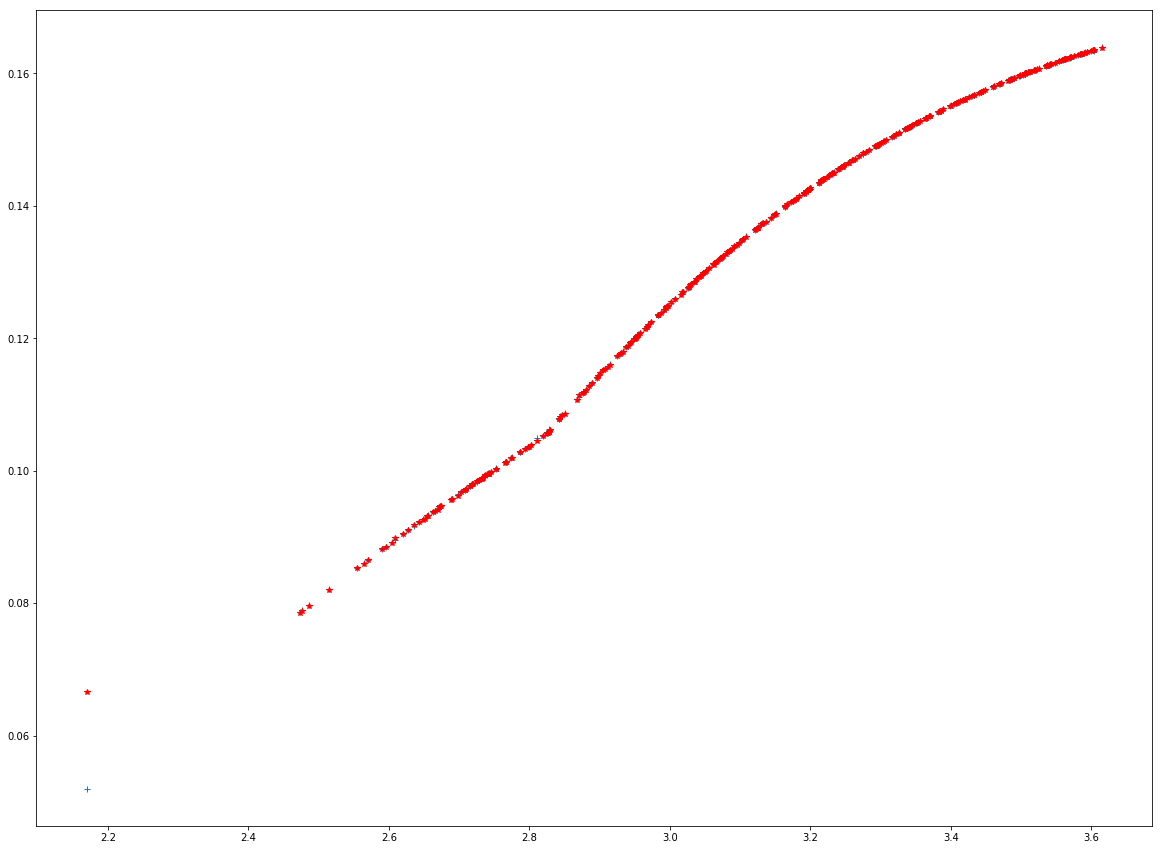

In [151]:
'''actual vs prediction'''
plt.plot(x_test[:,0], y_test, "+", label="actual")
plt.plot(x_test[:,0], preds, "r*", label="predicted")